In [175]:
import pandas as pd

Merhaba ismim Ulaş Özbent, bu not defterinde sizlere yapmış olduğum Film Tavsiye Sistemi'ni anlatacağım.

In [176]:
df_movies = pd.read_csv('movies.csv')
df_ratings = pd.read_csv('ratings.csv')
df_links = pd.read_csv('links.csv')


In [177]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [178]:
df_movies['genres'].value_counts().nlargest(100)

Drama                       1053
Comedy                       946
Comedy|Drama                 435
Comedy|Romance               363
Drama|Romance                349
                            ... 
Adventure|Comedy|Fantasy      15
Comedy|Drama|Fantasy          15
Adventure|Sci-Fi              15
Musical                       15
Adventure|Drama|Romance       15
Name: genres, Length: 100, dtype: int64

In [179]:
df_movies.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [180]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [181]:
df_links.tail()

,movieId,imdbId,tmdbId
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0
9741,193609,101726,37891.0


In [182]:
df_links['imdbId'] = df_links['imdbId'].apply(lambda x: f"https://www.imdb.com/title/tt{x}/?ref_=nv_sr_srsg_0")

In [183]:
#"https://www.imdb.com/title/tt0114709/?ref_=nv_sr_srsg_0"

In [184]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Aşağıdaki hücrede verimdeki genres kolonundaki türleri ayrı birer kolona çeviriyorum, ileride genres1'i baskın tür olarak belirleyeceğim.

In [185]:
#seperate genre for each movie and count genres
sss = df_movies['genres'].str.split(pat='|', expand=True).fillna(0)
sss.columns = ['genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre8', 'genre9', 'genre10']
cols = sss.columns
sss[cols] = sss[cols].astype('category')
ss1 = sss.copy()
cat_columns = ss1.select_dtypes(['category']).columns

#count genres (non zeros)
ss1[cat_columns] = ss1[cat_columns].apply(lambda x: x.cat.codes)
ss1['genre_count'] = ss1[cols].gt(0).sum(axis=1) #count greater than 0 values for less than: df[cols].lt(0).sum(axis=1), for equal==0: df[cols].eq(0).sum(axis=1)

#assigning everything to same dataframe
df_movies['genre_count'] = ss1['genre_count']
df_movies[cols] = sss[cols]

In [186]:
(df_movies['genre10'] != 0).value_counts()

False    9741
True        1
Name: genre10, dtype: int64

In [187]:
df_movies.shape

(9742, 14)

In [188]:
df_movies.tail()

,movieId,title,genres,genre_count,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4,Action,Animation,Comedy,Fantasy,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3,Animation,Comedy,Fantasy,0,0,0,0,0,0,0
9739,193585,Flint (2017),Drama,1,Drama,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2,Action,Animation,0,0,0,0,0,0,0,0
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,1,Comedy,0,0,0,0,0,0,0,0,0


In [189]:
data = pd.merge(df_movies,df_ratings)

df_movies ve df_ratings verisetlerini birleştirdim. Her filmin, kullanıcılar tarafından girilmiş ratingleri yeni verisetimizde mevcut olacak.

In [190]:
data.head()

,movieId,title,genres,genre_count,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,Adventure,Animation,Children,Comedy,Fantasy,0,0,0,0,0,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,Adventure,Animation,Children,Comedy,Fantasy,0,0,0,0,0,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,Adventure,Animation,Children,Comedy,Fantasy,0,0,0,0,0,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,Adventure,Animation,Children,Comedy,Fantasy,0,0,0,0,0,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,Adventure,Animation,Children,Comedy,Fantasy,0,0,0,0,0,17,4.5,1305696483


In [191]:
data.drop(["genres","timestamp"], axis = 1,inplace = True)

In [192]:
data.tail()

,movieId,title,genre_count,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,userId,rating
100831,193581,Black Butler: Book of the Atlantic (2017),4,Action,Animation,Comedy,Fantasy,0,0,0,0,0,0,184,4.0
100832,193583,No Game No Life: Zero (2017),3,Animation,Comedy,Fantasy,0,0,0,0,0,0,0,184,3.5
100833,193585,Flint (2017),1,Drama,0,0,0,0,0,0,0,0,0,184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple (2018),2,Action,Animation,0,0,0,0,0,0,0,0,184,3.5
100835,193609,Andrew Dice Clay: Dice Rules (1991),1,Comedy,0,0,0,0,0,0,0,0,0,331,4.0


Aşağıda görüldüğü üzere, verisetindeki bir filme girilen ratingler'in ortalamasını gösterdim.

In [193]:
df_deneme = data.loc[data['title']=='Batman Begins (2005)']

print(df_deneme['rating'].mean())

3.8620689655172415


In [194]:
df_deneme = data.loc[data['title']=='Oh, God! (1977)']

print(df_deneme['rating'].mean())

2.5


In [195]:
df_deneme = data.loc[data['title']=='Inception (2010)']

print(df_deneme['rating'].mean())

4.066433566433567


Aşağıda ise df_ratings verisetinden yeni bir veriseti oluşturdum. Böylelikle kullanıcı id'si ile film id'sini eşleştirebileceğim bir matrix oluşmuş oldu.

In [196]:
data_pivot2 = pd.pivot(index = "movieId", columns = "userId", data = df_ratings, values = "rating")
data_pivot2

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NaN değerleri 0'a eşitleyerek matriximi seyrek matrix'e çevirmiş oldum. knn'de bunu kullanacağım.

In [197]:
data_pivot2.fillna(0, inplace = True)
data_pivot2

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [198]:
from scipy.sparse import csr_matrix
csr_data = csr_matrix(data_pivot2.values)
data_pivot2.reset_index(inplace=True)

In [199]:
csr_data

<9724x610 sparse matrix of type '<class 'numpy.float64'>'
	with 100836 stored elements in Compressed Sparse Row format>

In [200]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [201]:
rating_avg = data.groupby('movieId')['rating'].mean().reset_index()
rating_avg = pd.DataFrame(rating_avg)

In [305]:
def movie_recommendation(movie_name):
    
    n_movies_to_reccomend = 10
    movie_list = data[data['title'].str.contains(movie_name, case=False)] # Fint movie name
    
    if len(movie_list):
        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = data_pivot2[data_pivot2['movieId'] == movie_idx].index[0]
        
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]  #ters olarak sıraladım çünkü distance küçülürse yakınlık artar.
        recommend_frame = []
        
        for val in rec_movie_indices:
            movie_idx = data_pivot2.iloc[val[0]]['movieId']
            #print(data.loc[data['title']==movie_idx])
            idx = data[data['movieId'] == movie_idx].index
            
            #print(data.iloc[idx]['rating'].values[0])
            

            #df_deneme = data.loc[data['title']==idx]

            recommend_frame.append({'Title':data.iloc[idx]['title'].values[0], 'Rating':round(data.iloc[idx]['rating'].mean(),1), 'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1)).iloc[::-1].reset_index()
        df.index = df.index + 1
        df.drop(["index"], axis = 1,inplace = True)
        return df
    
    else:
        return "No movies found. Please check your input"

In [306]:
movie_recommendation('harry potter')

,Title,Rating,Distance
1,Harry Potter and the Chamber of Secrets (2002),3.6,0.220439
2,Harry Potter and the Goblet of Fire (2005),3.8,0.273303
3,Harry Potter and the Prisoner of Azkaban (2004),3.9,0.274342
4,Harry Potter and the Half-Blood Prince (2009),3.9,0.383449
5,Shrek (2001),3.9,0.388015
6,Harry Potter and the Order of the Phoenix (2007),3.9,0.407405
7,Harry Potter and the Deathly Hallows: Part 1 (...,4.0,0.412444
8,"Monsters, Inc. (2001)",3.9,0.417215
9,Pirates of the Caribbean: The Curse of the Bla...,3.8,0.420404
10,Spider-Man (2002),3.5,0.420627


In [204]:
genre = data.genre1.value_counts()
genre = pd.DataFrame(genre)
genre = genre.reset_index()
genre.rename({'index': 'genre', 'genre1':'Count'}, axis=1, inplace=True)

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

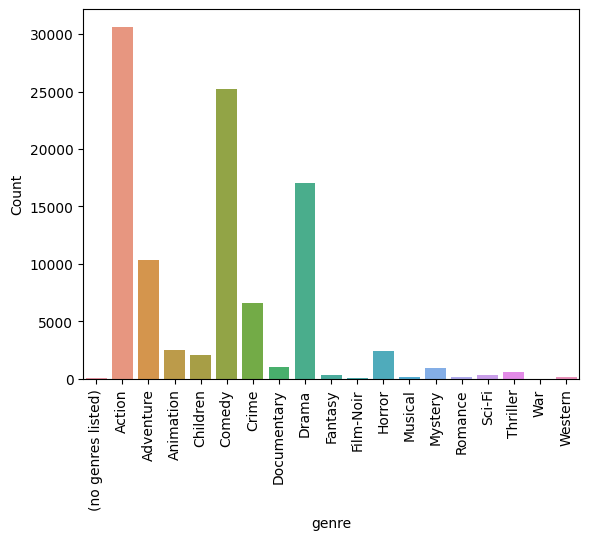

In [206]:
sns.barplot(x = genre.genre, y=genre.Count)
plt.xticks(rotation=90)
plt.show()

In [207]:
import plotly.express as px

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [209]:
import tensorflow as tf
import keras
from pprint import pprint

In [210]:
df_movies2 = pd.read_csv('movies.csv')

In [211]:
merged_dataset = pd.merge(df_ratings, df_movies2, how='inner', on='movieId')
merged_dataset.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [212]:
merged_dataset_new = pd.merge(df_ratings, df_movies, how='inner', on='movieId')
merged_dataset_new = merged_dataset_new.drop(merged_dataset_new.columns[[3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16]], axis=1)
merged_dataset_new.head()

,userId,movieId,rating,title,genre1
0,1,1,4.0,Toy Story (1995),Adventure
1,5,1,4.0,Toy Story (1995),Adventure
2,7,1,4.5,Toy Story (1995),Adventure
3,15,1,2.5,Toy Story (1995),Adventure
4,17,1,4.5,Toy Story (1995),Adventure


In [213]:
refined_dataset_son = merged_dataset_new.groupby(by=['userId','title'], as_index=False).agg({"rating":"mean", "genre1": "first"})

refined_dataset_son.head()

,userId,title,rating,genre1
0,1,"13th Warrior, The (1999)",4.0,Action
1,1,20 Dates (1998),4.0,Comedy
2,1,"Abyss, The (1989)",4.0,Action
3,1,"Adventures of Robin Hood, The (1938)",5.0,Action
4,1,Alice in Wonderland (1951),5.0,Adventure


In [214]:
refined_dataset = merged_dataset.groupby(by=['userId','title'], as_index=False).agg({"rating":"mean"})

refined_dataset.head()

,userId,title,rating
0,1,"13th Warrior, The (1999)",4.0
1,1,20 Dates (1998),4.0
2,1,"Abyss, The (1989)",4.0
3,1,"Adventures of Robin Hood, The (1938)",5.0
4,1,Alice in Wonderland (1951),5.0


LabelEncoder veriyi sayısallaştırmaya yarar, böylece makine öğrenmesi modelimiz veriyi anlamlandırabilecektir.

In [215]:
user_enc = LabelEncoder()
refined_dataset['user'] = user_enc.fit_transform(refined_dataset['userId'].values)
n_users = refined_dataset['user'].nunique()

In [216]:
item_enc = LabelEncoder()
refined_dataset['movie'] = item_enc.fit_transform(refined_dataset['title'].values)
n_movies = refined_dataset['movie'].nunique()

In [217]:
import numpy as np

In [218]:
refined_dataset['rating'] = refined_dataset['rating'].values.astype(np.float32)
min_rating = min(refined_dataset['rating'])
max_rating = max(refined_dataset['rating'])
n_users, n_movies, min_rating, max_rating

(610, 9719, 0.5, 5.0)

In [219]:
refined_dataset.head()

,userId,title,rating,user,movie
0,1,"13th Warrior, The (1999)",4.0,0,48
1,1,20 Dates (1998),4.0,0,66
2,1,"Abyss, The (1989)",4.0,0,202
3,1,"Adventures of Robin Hood, The (1938)",5.0,0,245
4,1,Alice in Wonderland (1951),5.0,0,325


In [220]:
X = refined_dataset[['user', 'movie']].values
y = refined_dataset['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90748, 2), (10084, 2), (90748,), (10084,))

In [221]:
n_factors = 150

In [222]:
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [223]:
X_train, X_train_array, X_train_array[0].shape

(array([[ 476, 2766],
        [ 155, 4464],
        [ 306, 8391],
        ...,
        [ 312, 5139],
        [ 154,  591],
        [  88, 8559]], dtype=int64),
 [array([476, 155, 306, ..., 312, 154,  88], dtype=int64),
  array([2766, 4464, 8391, ..., 5139,  591, 8559], dtype=int64)],
 (90748,))

In [224]:
y_train = (y_train - min_rating)/(max_rating - min_rating)
y_test = (y_test - min_rating)/(max_rating - min_rating)

In [225]:
from tensorflow.python.keras.layers import Input, Dense, Embedding

Deep Neural Network modelinin mimarisi

In [226]:
## Initializing a input layer for users
user = tf.keras.layers.Input(shape = (1,))

## Embedding layer for n_factors of users
u = tf.compat.v1.keras.layers.Embedding(n_users, n_factors, embeddings_initializer = 'he_normal', embeddings_regularizer = tf.keras.regularizers.l2(1e-6))(user)
u = tf.keras.layers.Reshape((n_factors,))(u)

## Initializing a input layer for movies
movie = tf.keras.layers.Input(shape = (1,))

## Embedding layer for n_factors of movies
m = tf.compat.v1.keras.layers.Embedding(n_movies, n_factors, embeddings_initializer = 'he_normal', embeddings_regularizer=tf.keras.regularizers.l2(1e-6))(movie)
m = tf.keras.layers.Reshape((n_factors,))(m)

## stacking up both user and movie embeddings
x = tf.keras.layers.Concatenate()([u,m])
x = tf.keras.layers.Dropout(0.05)(x)

## Adding a Dense layer to the architecture
x = tf.keras.layers.Dense(32, kernel_initializer='he_normal')(x)
x = tf.keras.layers.Activation(activation='relu')(x)
x = tf.keras.layers.Dropout(0.05)(x)

x = tf.keras.layers.Dense(16, kernel_initializer='he_normal')(x)
x = tf.keras.layers.Activation(activation='relu')(x)
x = tf.keras.layers.Dropout(0.05)(x)

## Adding an Output layer with Sigmoid activation funtion which gives output between 0 and 1
x = tf.keras.layers.Dense(9)(x)
x = tf.keras.layers.Activation(activation='softmax')(x)

## Adding a Lambda layer to convert the output to rating by scaling it with the help of available rating information
# x = tf.keras.layers.Lambda(lambda x: x*(max_rating - min_rating) + min_rating)(x)

## Defining the model
model = tf.keras.models.Model(inputs=[user,movie], outputs=x)
# optimizer = tf.keras.optimizers.Adam(lr=0.001)
# optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.005,
    # rho=0.9, momentum=0.01, epsilon=1e-07)

## Compiling the model
# model.compile(loss='binary_crossentropy', optimizer = optimizer)
# model.compile(loss='mean_squared_error', optimizer = optimizer,metrics=['accuracy'])
model.compile(optimizer='sgd', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [227]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 150)       91500       ['input_3[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 150)       1457850     ['input_4[0][0]']                
                                                                                            

In [228]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.75, patience=3, min_lr=0.000001, verbose=1)

history = model.fit(x = X_train_array, y = y_train, batch_size=128, epochs=70, verbose=1, validation_data=(X_test_array, y_test)
,shuffle=True,callbacks=[reduce_lr])

Epoch 1/70
709/709 [==============================] - 16s 21ms/step - loss: 0.6939 - accuracy: 0.0135 - val_loss: 0.4279 - val_accuracy: 0.0137 - lr: 0.0100
Epoch 2/70
709/709 [==============================] - 14s 20ms/step - loss: 0.4122 - accuracy: 0.0136 - val_loss: 0.3980 - val_accuracy: 0.0137 - lr: 0.0100
Epoch 3/70
709/709 [==============================] - 15s 21ms/step - loss: 0.3980 - accuracy: 0.0136 - val_loss: 0.3925 - val_accuracy: 0.0137 - lr: 0.0100
Epoch 4/70
709/709 [==============================] - 15s 21ms/step - loss: 0.3928 - accuracy: 0.0136 - val_loss: 0.3898 - val_accuracy: 0.0137 - lr: 0.0100
Epoch 5/70
709/709 [==============================] - 15s 21ms/step - loss: 0.3903 - accuracy: 0.0136 - val_loss: 0.3880 - val_accuracy: 0.0137 - lr: 0.0100
Epoch 6/70
709/709 [==============================] - 15s 21ms/step - loss: 0.3870 - accuracy: 0.0136 - val_loss: 0.3857 - val_accuracy: 0.0137 - lr: 0.0100
Epoch 7/70
709/709 [==============================] - 15s 

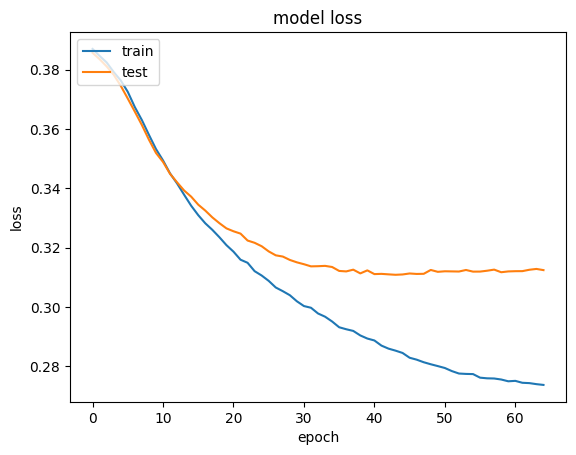

In [229]:
plt.plot(history.history["loss"][5:])
plt.plot(history.history["val_loss"][5:])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

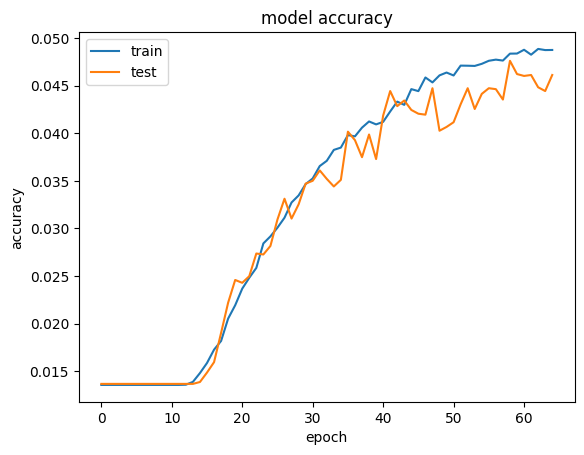

In [230]:
plt.plot(history.history["accuracy"][5:])
plt.plot(history.history["val_accuracy"][5:])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

Bu algoritmanın amacı, kullanıcının izlemediği filmlerin ratingler’ini tahmin etmek.

In [231]:
refined_dataset.head()

,userId,title,rating,user,movie
0,1,"13th Warrior, The (1999)",4.0,0,48
1,1,20 Dates (1998),4.0,0,66
2,1,"Abyss, The (1989)",4.0,0,202
3,1,"Adventures of Robin Hood, The (1938)",5.0,0,245
4,1,Alice in Wonderland (1951),5.0,0,325


In [232]:
refined_dataset.loc[refined_dataset['userId'] == 75]

,userId,title,rating,user,movie
12193,75,2001: A Space Odyssey (1968),3.5,74,74
12194,75,Alien (1979),4.5,74,327
12195,75,Aliens (1986),2.5,74,333
12196,75,Alien³ (a.k.a. Alien 3) (1992),3.0,74,334
12197,75,"Andromeda Strain, The (1971)",4.0,74,491
...,...,...,...,...,...
12257,75,Unforgiven (1992),4.0,74,9075
12258,75,V for Vendetta (2006),4.5,74,9120
12259,75,Vertigo (1958),1.0,74,9163
12260,75,Willow (1988),1.5,74,9484


In [233]:
X_train_array

[array([476, 155, 306, ..., 312, 154,  88], dtype=int64),
 array([2766, 4464, 8391, ..., 5139,  591, 8559], dtype=int64)]

In [234]:
user_id = [75]
encoded_user_id = user_enc.transform(user_id)

seen_movies = list(refined_dataset[refined_dataset['userId'] == user_id[0]]['movie'])
print(seen_movies)
     

[74, 327, 333, 334, 491, 836, 1146, 1338, 1593, 1932, 2212, 2394, 2596, 2951, 3054, 3139, 3350, 3539, 3938, 4134, 4334, 4344, 4345, 4375, 4382, 4415, 4634, 4653, 4972, 5204, 5205, 5206, 5512, 5677, 5988, 5998, 5999, 6176, 6667, 6670, 6944, 7000, 7054, 7180, 7182, 7510, 7523, 7653, 7654, 7738, 7987, 7989, 7992, 7998, 8000, 8001, 8002, 8062, 8184, 8289, 8363, 8367, 8779, 8896, 9075, 9120, 9163, 9484, 9535]


In [235]:
len(refined_dataset['movie'].unique()), min(refined_dataset['movie']), max(refined_dataset['movie'])

(9719, 0, 9718)

In [236]:
unseen_movies = [i for i in range(min(refined_dataset['movie']), max(refined_dataset['movie'])+1) if i not in seen_movies]
#print(unseen_movies)

In [237]:
"""
unseen_movies = {}

# iterate through the dictionary of seen movies
for user_id, unseen_movie_list in seen_movies.items():
  # create a list of all movies in the dataset that the user has not seen
  unseen_movie_list = [movie for movie in refined_dataset_son['title'] if movie not in seen_movies_list]
  
  # store the list of unseen movies for the user in the dictionary
  unseen_movies[user_id] = unseen_movie_list
  
# print the dictionary to see the results
print(dict(list(unseen_movies.items())[:3]))

"""


"\nunseen_movies = {}\n\n# iterate through the dictionary of seen movies\nfor user_id, unseen_movie_list in seen_movies.items():\n  # create a list of all movies in the dataset that the user has not seen\n  unseen_movie_list = [movie for movie in refined_dataset_son['title'] if movie not in seen_movies_list]\n  \n  # store the list of unseen movies for the user in the dictionary\n  unseen_movies[user_id] = unseen_movie_list\n  \n# print the dictionary to see the results\nprint(dict(list(unseen_movies.items())[:3]))\n\n"

In [238]:
#print(dict(list(unseen_movies.items())[:1]))

In [239]:
len(unseen_movies) + len(seen_movies)

9719

In [240]:
model_input = [np.asarray(list(encoded_user_id)*len(unseen_movies)), np.asarray(unseen_movies)]
len(model_input), len(model_input[0])

(2, 9650)

In [241]:
model_df = pd.DataFrame( columns=model_input)

In [242]:
model_df

Empty DataFrame
Columns: [(74, 0), (74, 1), (74, 2), (74, 3), (74, 4), (74, 5), (74, 6), (74, 7), (74, 8), (74, 9), (74, 10), (74, 11), (74, 12), (74, 13), (74, 14), (74, 15), (74, 16), (74, 17), (74, 18), (74, 19), (74, 20), (74, 21), (74, 22), (74, 23), (74, 24), (74, 25), (74, 26), (74, 27), (74, 28), (74, 29), (74, 30), (74, 31), (74, 32), (74, 33), (74, 34), (74, 35), (74, 36), (74, 37), (74, 38), (74, 39), (74, 40), (74, 41), (74, 42), (74, 43), (74, 44), (74, 45), (74, 46), (74, 47), (74, 48), (74, 49), (74, 50), (74, 51), (74, 52), (74, 53), (74, 54), (74, 55), (74, 56), (74, 57), (74, 58), (74, 59), (74, 60), (74, 61), (74, 62), (74, 63), (74, 64), (74, 65), (74, 66), (74, 67), (74, 68), (74, 69), (74, 70), (74, 71), (74, 72), (74, 73), (74, 75), (74, 76), (74, 77), (74, 78), (74, 79), (74, 80), (74, 81), (74, 82), (74, 83), (74, 84), (74, 85), (74, 86), (74, 87), (74, 88), (74, 89), (74, 90), (74, 91), (74, 92), (74, 93), (74, 94), (74, 95), (74, 96), (74, 97), (74, 98), (74, 99), (74, 100), ...]
Index: []

[0 rows x 9650 columns]

In [243]:
predicted_ratings = model.predict(model_input)

302/302 [==============================] - 1s 2ms/step


In [244]:
print(predicted_ratings.shape)

(9650, 9)


In [245]:
print(predicted_ratings)

[[9.9074417e-01 9.2381416e-03 1.5763810e-06 ... 1.1959262e-06
  1.5531349e-06 2.0386292e-06]
 [9.8785245e-01 1.2123296e-02 2.1896342e-06 ... 1.6334016e-06
  2.1415649e-06 2.7954591e-06]
 [9.8937058e-01 1.0611118e-02 1.6374228e-06 ... 1.2276437e-06
  1.5776131e-06 2.1423170e-06]
 ...
 [9.9108750e-01 8.8944733e-03 1.6357309e-06 ... 1.1944231e-06
  1.5821392e-06 2.0989905e-06]
 [9.8629516e-01 1.3677905e-02 2.4260530e-06 ... 1.8219438e-06
  2.3468879e-06 3.0916085e-06]
 [9.8796171e-01 1.2013538e-02 2.2386289e-06 ... 1.6738883e-06
  2.1898347e-06 2.8694603e-06]]


In [246]:
predicted_ratings = np.max(predicted_ratings, axis=1)
predicted_ratings

array([0.9907442 , 0.98785245, 0.9893706 , ..., 0.9910875 , 0.98629516,
       0.9879617 ], dtype=float32)

In [247]:
predicted_ratings[-50:]

array([0.9935661 , 0.98949975, 0.9922232 , 0.9823308 , 0.98951274,
       0.9893856 , 0.98808646, 0.9839924 , 0.98942953, 0.99284136,
       0.99192613, 0.9900974 , 0.9850699 , 0.98817235, 0.9741853 ,
       0.98940897, 0.9776921 , 0.9888432 , 0.9825785 , 0.99232775,
       0.97563374, 0.9740908 , 0.99429363, 0.9887573 , 0.9874523 ,
       0.9869658 , 0.9832375 , 0.9887629 , 0.9847548 , 0.9866151 ,
       0.96205527, 0.9901551 , 0.98906976, 0.9888131 , 0.9743112 ,
       0.9912429 , 0.98707205, 0.9835845 , 0.9929509 , 0.9751288 ,
       0.98544866, 0.9552576 , 0.99131876, 0.9911861 , 0.99038845,
       0.9814735 , 0.9948132 , 0.9910875 , 0.98629516, 0.9879617 ],
      dtype=float32)

In [248]:
len(predicted_ratings)

9650

In [249]:
min_index = np.argmin(predicted_ratings)
print("The index of the minimum score is:", min_index)

The index of the minimum score is: 1364


In [250]:
np.mean(predicted_ratings, axis=None)

0.9840352

In [251]:
predicted_ratings.shape

(9650,)

In [252]:
sorted_index = np.argsort(predicted_ratings)[::-1]
print(sorted_index)

[ 222 3991 7857 ... 3482 7546 1364]


In [253]:
recommended_movies = item_enc.inverse_transform(sorted_index)
recommended_movies

array(['Addams Family Reunion (1998)',
       'Holy Mountain, The (Montaña sagrada, La) (1973)',
       'Song of the South (1946)', ..., 'Glimmer Man, The (1996)',
       'Sexy Beast (2000)', 'Bride Wars (2009)'], dtype=object)

In [254]:
from pprint import pprint
pprint(list(recommended_movies[:20]))

['Addams Family Reunion (1998)',
 'Holy Mountain, The (Montaña sagrada, La) (1973)',
 'Song of the South (1946)',
 'Batman & Robin (1997)',
 'Wal-Mart: The High Cost of Low Price (2005)',
 'Boys from Brazil, The (1978)',
 "Mr. Holland's Opus (1995)",
 'Evolution (2001)',
 'Spring Forward (1999)',
 'Diabolique (Les diaboliques) (1955)',
 'Meatballs III (1987)',
 'Coach Carter (2005)',
 'Toy Story 3 (2010)',
 'Deceiver (1997)',
 'Rules of Engagement (2000)',
 'Psycho Beach Party (2000)',
 'Backbeat (1993)',
 'Basket Case (1982)',
 'Commitments, The (1991)',
 'Go Fish (1994)']


In [255]:
df_recom = pd.DataFrame(recommended_movies, columns=['movie'])

In [256]:
df_recom

,movie
0,Addams Family Reunion (1998)
1,"Holy Mountain, The (Montaña sagrada, La) (1973)"
2,Song of the South (1946)
3,Batman & Robin (1997)
4,Wal-Mart: The High Cost of Low Price (2005)
...,...
9645,"Parent Trap, The (1961)"
9646,"Amazing Panda Adventure, The (1995)"
9647,"Glimmer Man, The (1996)"
9648,Sexy Beast (2000)


In [257]:
data.head()

,movieId,title,genre_count,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,userId,rating
0,1,Toy Story (1995),5,Adventure,Animation,Children,Comedy,Fantasy,0,0,0,0,0,1,4.0
1,1,Toy Story (1995),5,Adventure,Animation,Children,Comedy,Fantasy,0,0,0,0,0,5,4.0
2,1,Toy Story (1995),5,Adventure,Animation,Children,Comedy,Fantasy,0,0,0,0,0,7,4.5
3,1,Toy Story (1995),5,Adventure,Animation,Children,Comedy,Fantasy,0,0,0,0,0,15,2.5
4,1,Toy Story (1995),5,Adventure,Animation,Children,Comedy,Fantasy,0,0,0,0,0,17,4.5


In [258]:
refined_dataset2 = refined_dataset.copy()

In [259]:
with open('input.txt', 'r') as f:
  input_data = int(f.read())
  
# Use the input data as the input to your notebook
print(input_data)

43


In [260]:
type(input_data)

int

In [261]:
refined_dataset2 = refined_dataset2[refined_dataset2['userId'] == input_data]

In [262]:
refined_dataset2.rename(columns = {'title':'movie', 'movie':'movieId'}, inplace = True)

In [263]:
refined_dataset2

,userId,movie,rating,user,movieId
6314,43,Ace Ventura: Pet Detective (1994),4.0,42,207
6315,43,Addams Family Values (1993),4.0,42,223
6316,43,"Adventures of Pinocchio, The (1996)",5.0,42,242
6317,43,Airheads (1994),3.0,42,289
6318,43,Aladdin (1992),5.0,42,298
...,...,...,...,...,...
6423,43,True Lies (1994),3.0,42,8949
6424,43,Waterworld (1995),4.0,42,9298
6425,43,While You Were Sleeping (1995),4.0,42,9403
6426,43,Willy Wonka & the Chocolate Factory (1971),5.0,42,9485


In [264]:
merged_dataset2 = pd.merge(df_recom, refined_dataset2, how='inner', on='movie')

In [265]:
merged_dataset2.head()

,movie,userId,rating,user,movieId
0,Ace Ventura: Pet Detective (1994),43,4.0,42,207
1,Jury Duty (1995),43,5.0,42,4667
2,Star Trek: Generations (1994),43,5.0,42,7994
3,Forrest Gump (1994),43,5.0,42,3158
4,Seven (a.k.a. Se7en) (1995),43,4.0,42,7523


In [266]:
np.mean(merged_dataset2['rating'].value_counts().index)

4.0

In [267]:
data3 = data.copy()

In [268]:
data3.head()

,movieId,title,genre_count,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,userId,rating
0,1,Toy Story (1995),5,Adventure,Animation,Children,Comedy,Fantasy,0,0,0,0,0,1,4.0
1,1,Toy Story (1995),5,Adventure,Animation,Children,Comedy,Fantasy,0,0,0,0,0,5,4.0
2,1,Toy Story (1995),5,Adventure,Animation,Children,Comedy,Fantasy,0,0,0,0,0,7,4.5
3,1,Toy Story (1995),5,Adventure,Animation,Children,Comedy,Fantasy,0,0,0,0,0,15,2.5
4,1,Toy Story (1995),5,Adventure,Animation,Children,Comedy,Fantasy,0,0,0,0,0,17,4.5


Aşağıdaki hücrede, data3 verisetimizdeki aynı filmleri alıp, daha sonra onlara verilmiş ratingler'in ortalamalarını alıp yeni bir veriseti oluşturdum.

In [ ]:
df_ortalamalar = pd.DataFrame(columns=['Film', 'Ortalama Oy'])

# Film kolonundaki tüm farklı değerleri alın
for film in data3['title'].unique():
  # Film kolonunda o değere sahip satırları seçin
  film_satirlari = data3[data3['title'] == film]
  # o film için kullanıcı oylarının ortalamasını alın
  ortalama_oy = film_satirlari['rating'].mean()
  # yeni veri çerçevesine o film ve ortalama oy değerlerini ekleyin
  df_ortalamalar = df_ortalamalar.append({'Film': film, 'Ortalama Oy': ortalama_oy}, ignore_index=True)


In [270]:
df_ortalamalar

,Film,Ortalama Oy
0,Toy Story (1995),3.920930
1,Jumanji (1995),3.431818
2,Grumpier Old Men (1995),3.259615
3,Waiting to Exhale (1995),2.357143
4,Father of the Bride Part II (1995),3.071429
...,...,...
9714,Black Butler: Book of the Atlantic (2017),4.000000
9715,No Game No Life: Zero (2017),3.500000
9716,Flint (2017),3.500000
9717,Bungo Stray Dogs: Dead Apple (2018),3.500000


In [271]:
df_ortalamalar.rename(columns = {'Film':'movie'}, inplace = True)

In [272]:
df_ortalamalar

,movie,Ortalama Oy
0,Toy Story (1995),3.920930
1,Jumanji (1995),3.431818
2,Grumpier Old Men (1995),3.259615
3,Waiting to Exhale (1995),2.357143
4,Father of the Bride Part II (1995),3.071429
...,...,...
9714,Black Butler: Book of the Atlantic (2017),4.000000
9715,No Game No Life: Zero (2017),3.500000
9716,Flint (2017),3.500000
9717,Bungo Stray Dogs: Dead Apple (2018),3.500000


In [273]:
merged_dataset5 = pd.merge(df_recom, df_ortalamalar, how='inner', on='movie')

In [274]:
merged_dataset5

,movie,Ortalama Oy
0,Addams Family Reunion (1998),3.000000
1,"Holy Mountain, The (Montaña sagrada, La) (1973)",4.500000
2,Song of the South (1946),3.416667
3,Batman & Robin (1997),2.214286
4,Wal-Mart: The High Cost of Low Price (2005),4.500000
...,...,...
9645,"Parent Trap, The (1961)",3.208333
9646,"Amazing Panda Adventure, The (1995)",3.333333
9647,"Glimmer Man, The (1996)",3.000000
9648,Sexy Beast (2000),3.714286


In [275]:
merged_dataset5['Ortalama Oy'] = round(merged_dataset5['Ortalama Oy'],1)

In [276]:
merged_dataset5[:20]

,movie,Ortalama Oy
0,Addams Family Reunion (1998),3.0
1,"Holy Mountain, The (Montaña sagrada, La) (1973)",4.5
2,Song of the South (1946),3.4
3,Batman & Robin (1997),2.2
4,Wal-Mart: The High Cost of Low Price (2005),4.5
5,"Boys from Brazil, The (1978)",3.7
6,Mr. Holland's Opus (1995),3.7
7,Evolution (2001),3.0
8,Spring Forward (1999),2.0
9,Diabolique (Les diaboliques) (1955),3.1


In [277]:
final = merged_dataset5[:20]
final

,movie,Ortalama Oy
0,Addams Family Reunion (1998),3.0
1,"Holy Mountain, The (Montaña sagrada, La) (1973)",4.5
2,Song of the South (1946),3.4
3,Batman & Robin (1997),2.2
4,Wal-Mart: The High Cost of Low Price (2005),4.5
5,"Boys from Brazil, The (1978)",3.7
6,Mr. Holland's Opus (1995),3.7
7,Evolution (2001),3.0
8,Spring Forward (1999),2.0
9,Diabolique (Les diaboliques) (1955),3.1


In [278]:
data.loc[data['title'] == 'Inception (2010)']

,movieId,title,genre_count,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,userId,rating
91356,79132,Inception (2010),7,Action,Crime,Drama,Mystery,Sci-Fi,Thriller,IMAX,0,0,0,2,4.0
91357,79132,Inception (2010),7,Action,Crime,Drama,Mystery,Sci-Fi,Thriller,IMAX,0,0,0,15,3.5
91358,79132,Inception (2010),7,Action,Crime,Drama,Mystery,Sci-Fi,Thriller,IMAX,0,0,0,16,3.0
91359,79132,Inception (2010),7,Action,Crime,Drama,Mystery,Sci-Fi,Thriller,IMAX,0,0,0,17,4.5
91360,79132,Inception (2010),7,Action,Crime,Drama,Mystery,Sci-Fi,Thriller,IMAX,0,0,0,18,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91494,79132,Inception (2010),7,Action,Crime,Drama,Mystery,Sci-Fi,Thriller,IMAX,0,0,0,596,4.0
91495,79132,Inception (2010),7,Action,Crime,Drama,Mystery,Sci-Fi,Thriller,IMAX,0,0,0,598,5.0
91496,79132,Inception (2010),7,Action,Crime,Drama,Mystery,Sci-Fi,Thriller,IMAX,0,0,0,599,3.0
91497,79132,Inception (2010),7,Action,Crime,Drama,Mystery,Sci-Fi,Thriller,IMAX,0,0,0,601,5.0


In [279]:
data.loc[data['title'] == 'What Men Talk About (2010)']  #rating'in bu kadar yüksek çıkmasının sebebi bir kullanıcının giriş yapmasıymış.

,movieId,title,genre_count,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,userId,rating
98693,131237,What Men Talk About (2010),1,Comedy,0,0,0,0,0,0,0,0,0,105,5.0


In [280]:
final

,movie,Ortalama Oy
0,Addams Family Reunion (1998),3.0
1,"Holy Mountain, The (Montaña sagrada, La) (1973)",4.5
2,Song of the South (1946),3.4
3,Batman & Robin (1997),2.2
4,Wal-Mart: The High Cost of Low Price (2005),4.5
5,"Boys from Brazil, The (1978)",3.7
6,Mr. Holland's Opus (1995),3.7
7,Evolution (2001),3.0
8,Spring Forward (1999),2.0
9,Diabolique (Les diaboliques) (1955),3.1


In [281]:
"""
df_recom2 = pd.DataFrame(recommended_movies, columns=['movie'])
refined_dataset3 = refined_dataset.copy()
with open('input.txt', 'r') as f:
  input_data = int(f.read())
  
# Use the input data as the input to your notebook
print(input_data)

refined_dataset3 = refined_dataset3[refined_dataset3['userId'] == input_data]

data4 = data.copy()

refined_dataset3.rename(columns = {'title':'movie', 'movie':'movieId'}, inplace = True)

df_ortalamalar2 = pd.DataFrame(columns=['Film', 'Ortalama Oy'])

# Film kolonundaki tüm farklı değerleri alın
for film in data4['title'].unique():
  # Film kolonunda o değere sahip satırları seçin
  film_satirlari = data4[data4['title'] == film]
  # o film için kullanıcı oylarının ortalamasını alın
  ortalama_oy = film_satirlari['rating'].mean()
  # yeni veri çerçevesine o film ve ortalama oy değerlerini ekleyin
  df_ortalamalar2 = df_ortalamalar2.append({'Film': film, 'Ortalama Oy': ortalama_oy}, ignore_index=True)

df_ortalamalar2.rename(columns = {'Film':'movie'}, inplace = True)

merged_dataset6 = pd.merge(df_recom2, df_ortalamalar2, how='inner', on='movie')

merged_dataset6['Ortalama Oy'] = round(merged_dataset6['Ortalama Oy'],1)
final2 = merged_dataset6[:20]

final2
"""


"\ndf_recom2 = pd.DataFrame(recommended_movies, columns=['movie'])\nrefined_dataset3 = refined_dataset.copy()\nwith open('input.txt', 'r') as f:\n  input_data = int(f.read())\n  \n# Use the input data as the input to your notebook\nprint(input_data)\n\nrefined_dataset3 = refined_dataset3[refined_dataset3['userId'] == input_data]\n\ndata4 = data.copy()\n\nrefined_dataset3.rename(columns = {'title':'movie', 'movie':'movieId'}, inplace = True)\n\ndf_ortalamalar2 = pd.DataFrame(columns=['Film', 'Ortalama Oy'])\n\n# Film kolonundaki tüm farklı değerleri alın\nfor film in data4['title'].unique():\n  # Film kolonunda o değere sahip satırları seçin\n  film_satirlari = data4[data4['title'] == film]\n  # o film için kullanıcı oylarının ortalamasını alın\n  ortalama_oy = film_satirlari['rating'].mean()\n  # yeni veri çerçevesine o film ve ortalama oy değerlerini ekleyin\n  df_ortalamalar2 = df_ortalamalar2.append({'Film': film, 'Ortalama Oy': ortalama_oy}, ignore_index=True)\n\ndf_ortalamalar2.re

In [282]:
# create an empty dictionary to store the movie lists and ratings for each user
seened_movies = {}

# iterate through the dataset
for index, row in refined_dataset_son.iterrows():
  user_id = row['userId']
  movie_name = row['title']
  rating = row['rating']
  genre = row['genre1']
  
  # if the user is not in the dictionary, add them with an empty movie list and rating list
  if user_id not in seened_movies:
    seened_movies[user_id] = {'movies': [], 'ratings': [], 'genre': []}
  
  # append the movie and rating to the user's lists
  seened_movies[user_id]['movies'].append(movie_name)
  seened_movies[user_id]['ratings'].append(rating)
  seened_movies[user_id]['genre'].append(genre)
  
# print the dictionary to see the results
#print(seen_movies)

In [283]:
# create an empty list to store the seen movies and ratings lists
seened_movies_list = []

# iterate through the dictionary of seen movies and ratings
for user_id, movies_ratings in seened_movies.items():
  # create a tuple with the user ID, the list of movies, and the list of ratings
  seened_movies_list.append((user_id, movies_ratings['movies'], movies_ratings['ratings'], movies_ratings['genre']))
  
# print the list to see the results
print(seened_movies_list[:1])

[(1, ['13th Warrior, The (1999)', '20 Dates (1998)', 'Abyss, The (1989)', 'Adventures of Robin Hood, The (1938)', 'Alice in Wonderland (1951)', 'Alien (1979)', 'All Quiet on the Western Front (1930)', 'American Beauty (1999)', 'American History X (1998)', 'American Tail, An (1986)', 'Apocalypse Now (1979)', 'Austin Powers: International Man of Mystery (1997)', 'Back to the Future (1985)', 'Back to the Future Part III (1990)', 'Bambi (1942)', 'Basic Instinct (1992)', 'Batman (1989)', 'Batman Returns (1992)', 'Bedknobs and Broomsticks (1971)', 'Beetlejuice (1988)', 'Being John Malkovich (1999)', 'Best Men (1997)', 'Big (1988)', 'Big Lebowski, The (1998)', 'Big Trouble in Little China (1986)', 'Billy Madison (1995)', 'Black Cauldron, The (1985)', 'Blazing Saddles (1974)', 'Blown Away (1994)', 'Blues Brothers, The (1980)', 'Bottle Rocket (1996)', 'Braveheart (1995)', 'Canadian Bacon (1995)', "Charlotte's Web (1973)", 'Citizen Kane (1941)', 'Clear and Present Danger (1994)', 'Clerks (1994)'

In [284]:
seened_movies_df = pd.DataFrame(refined_dataset_son, columns=['userId', 'title', 'rating', 'genre1'])
seened_movies_df


,userId,title,rating,genre1
0,1,"13th Warrior, The (1999)",4.0,Action
1,1,20 Dates (1998),4.0,Comedy
2,1,"Abyss, The (1989)",4.0,Action
3,1,"Adventures of Robin Hood, The (1938)",5.0,Action
4,1,Alice in Wonderland (1951),5.0,Adventure
...,...,...,...,...
100827,610,[REC] (2007),4.0,Drama
100828,610,[REC]² (2009),3.5,Horror
100829,610,[REC]³ 3 Génesis (2012),3.0,Horror
100830,610,xXx (2002),2.0,Action


In [285]:
movies_list = []

# iterate over the rows of the grouped dataframe
for index, row in seened_movies_df.iterrows():
  # extract the values of the user_id, movie_name, and genre columns
  user_id = row['userId']
  movie_name = row['title']
  ratings = row['rating']
  genre = row['genre1']
  
  # create a list with the values and append it to the movies_list
  movies_list.append([user_id, movie_name, ratings, genre])

# print the movies_list to see the results
#print(movies_list)

In [286]:
print(movies_list[1][3])

Comedy


In [287]:
print(movies_list[0][0])

1


In [288]:
print(movies_list[:][1])

[1, '20 Dates (1998)', 4.0, 'Comedy']


In [289]:
user_ids = []

for movie in movies_list:
    user_id = movie[0]
    if user_id not in user_ids:
        user_ids.append(user_id)

#print(user_ids)

In [290]:
for i in range(len(movies_list[:10])):
    print(movies_list[i])  

[1, '13th Warrior, The (1999)', 4.0, 'Action']
[1, '20 Dates (1998)', 4.0, 'Comedy']
[1, 'Abyss, The (1989)', 4.0, 'Action']
[1, 'Adventures of Robin Hood, The (1938)', 5.0, 'Action']
[1, 'Alice in Wonderland (1951)', 5.0, 'Adventure']
[1, 'Alien (1979)', 4.0, 'Horror']
[1, 'All Quiet on the Western Front (1930)', 5.0, 'Action']
[1, 'American Beauty (1999)', 5.0, 'Drama']
[1, 'American History X (1998)', 5.0, 'Crime']
[1, 'American Tail, An (1986)', 5.0, 'Adventure']


In [291]:
# initialize a dictionary to store the counts of each genre for each user_id
genre_counts = {}

for movie in movies_list:
    user_id, movie_name, ratings, genre = movie
    if user_id not in genre_counts:
        genre_counts[user_id] = {}
    if genre not in genre_counts[user_id]:
        genre_counts[user_id][genre] = 1
    else:
        genre_counts[user_id][genre] += 1

# To find the favorite genre of each user, you can use the following code snippet
for user_id, genres in genre_counts.items():
    favorite_genre = max(genres, key=genres.get)
    #print(f'The favorite genre of user {user_id} is {favorite_genre}')

In [308]:
user_id = 35

if user_id in genre_counts:
    user_genres = genre_counts[user_id]
    favorite_genre = max(user_genres, key=user_genres.get)
    print(f'The favorite genre of user {user_id} is {favorite_genre}')
else:
    print(f'The user {user_id} is not in the dataset')

The favorite genre of user 35 is Comedy


In [293]:
# create a dictionary of unseen movies with the movie titles as keys and the default value as None
unseened_movies = {movie: None for movie in seened_movies_df['title'] if movie not in seened_movies_list}


In [294]:
type(unseened_movies)

dict

In [295]:
print(dict(list(unseened_movies.items())[:10]))

{'13th Warrior, The (1999)': None, '20 Dates (1998)': None, 'Abyss, The (1989)': None, 'Adventures of Robin Hood, The (1938)': None, 'Alice in Wonderland (1951)': None, 'Alien (1979)': None, 'All Quiet on the Western Front (1930)': None, 'American Beauty (1999)': None, 'American History X (1998)': None, 'American Tail, An (1986)': None}
